Lambda School Data Science

*Unit 1, Sprint 1, Module 4*

---

# Make Explanatory Visualizations

### Objectives

- Student can identify the appropriate visualization type for a particular variable type and research question 
- Student can use Matplotlib to visualize distributions and relationships with continuous and discrete variables
- Student can add emphasis and annotations to transform visualizations from exploratory to explanatory
- Student can remove clutter from visualizations
- Student can identify misleading visualizations and how to fix them



Import the Titanic dataset and print the first 5 rows.

In [15]:

import pandas as pd

# Load the Titanic dataset from its URL:
titanic = pd.read_csv('https://raw.githubusercontent.com/LambdaSchool/data-science-practice-datasets/main/unit_1/Titanic/Titanic.csv')

print(titanic.shape)
titanic.head()

(887, 8)


,Survived,Pclass,Name,Sex,Age,Siblings/Spouses_Aboard,Parents/Children_Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


In [35]:
fare_total = titanic['Fare'].value_counts()
print(fare_total)

8.0500     43
13.0000    42
7.8958     36
7.7500     33
26.0000    31
           ..
8.4583      1
9.8375      1
8.3625      1
14.1083     1
17.4000     1
Name: Fare, Length: 248, dtype: int64


###1) What is the appropriate type of graph to answer the question "What was the typical fare paid for passage on the Titanic?"



I think either a distributation or a magnitude type graph would be best suited to answer the question. I would use either a histogram or column graph.

###2) Create the display you visualization you selected in 2).  Don't forget to name the axes and give the figure a title. 

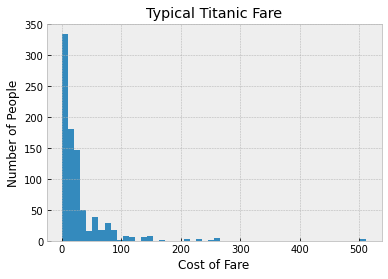

In [50]:
#Code here
import matplotlib.pyplot as plt
plt.style.use('bmh')
num_bins = 50

fig, ax=plt.subplots()

ax.hist(titanic['Fare'], num_bins)

ax.set_xlabel('Cost of Fare')
ax.set_ylabel('Number of People')
ax.set_title('Typical Titanic Fare')

plt.show()


###3) Describe your results in a sentence or two.

The majority of passengers paid around $10 for a fare. There were a few outlyers who paid alot more.

###4) Plot a histogram of fare paid by Titanic passengers by sex to see if there was a difference in fare paid between male and female passengers.  

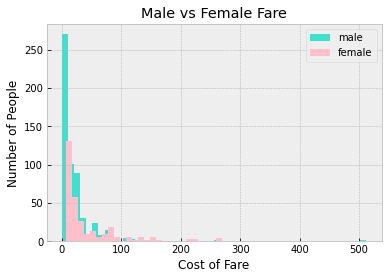

In [61]:
#Code here
male = titanic[titanic['Sex'] == 'male']
female = titanic[titanic['Sex'] == 'female']

fig, ax=plt.subplots()

ax.hist(male['Fare'], num_bins, color='turquoise', label= 'male')
ax.hist(female['Fare'], num_bins, color='pink', label= 'female')

ax.set_xlabel('Cost of Fare')
ax.set_ylabel('Number of People')
ax.set_title('Male vs Female Fare')

ax.legend()

plt.show()

###5) Describe the difference in distribution of fare paid between male and female passengers.

This data mostly tells me that there were more men than females on the boat. It does look like the females typically paid a little more than the men.

###6) Make a bar plot to show the frequency of individuals in each passenger class.

In [64]:
class_total = titanic['Pclass'].value_counts()

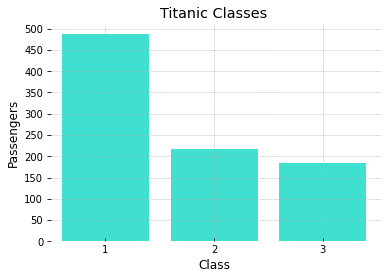

In [78]:
# code here
fig, ax = plt.subplots()

ax.bar([1, 2, 3], class_total, color= 'turquoise')

ax.set_facecolor('white')

ax.set_xlabel('Class')
ax.set_ylabel('Passengers')
ax.set_title('Titanic Classes')

ax.set_xticks([1, 2, 3])
ax.set_yticks([0, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500])

ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)

plt.show()


###7) Summarize your results from 6)

Majority of passengers were in class one with class 2 and 3 pretty close to one another.

###8) Create a graphical summary for the number of parents/ children on board for each passenger.

0    674
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parents/Children_Aboard, dtype: int64


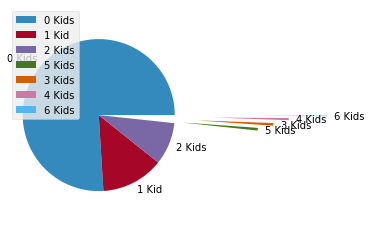

In [101]:
#Code here
kids = titanic['Parents/Children_Aboard'].value_counts()
labels=['0 Kids', '1 Kid', '2 Kids', '5 Kids', '3 Kids', '4 Kids', '6 Kids']
explode = (0, 0, 0, 1.1, 1.3, 1.5, 2)

fig, ax = plt.subplots()

ax.pie(kids, explode=explode, labels=labels)
ax.axis('equal')

ax.legend()
plt.show
print(kids)

###9) Summarize your results from 8).  Did most individuals travel alone or with family?

The vast majority of people did not travel with children. When people did travel with kids, it was mostly with one or two children.

###In 10) - 14)  We will use figure, axes syntax to plot passenger survival by whether the passenger was a child or an adult. 

###10) Create a variable to categorize the passenger as a child (under age 18) or adult (18 years or older).

In [126]:
#Code here
def child_or_adult(age):
  if age < 18.0:
    return 'child'
  else:
    return 'adult'

titanic['child_adult'] = titanic['Age'].apply(child_or_adult)


adult    757
child    130
Name: child_adult, dtype: int64

###11) Make a cross-tab of survival by age (child vs adult).

In [129]:
#Code here
pd.crosstab(index=titanic['Survived'], columns=titanic['child_adult'])

child_adult,adult,child
Survived,,
0,480,65
1,277,65


###12) Create a new data frame to hold the data for the figure.

In [135]:
#Code here
survival = pd.crosstab(index=titanic['Survived'], columns=titanic['child_adult'])
survival

child_adult,adult,child
Survived,,
0,480,65
1,277,65


###13) Adapt the plot from the Guided Project to show the relationship between passenger age (child vs adult) and survival.

TypeError: ignored

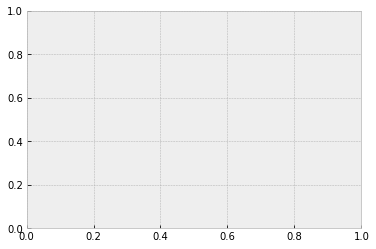

In [143]:
#Code here
fig, ax = plt.subplots()

ax.bar([1,2], survival)

plt.show()



###14) Summarize your results about passenger survival by age.

I was not able to plot the crosstab.

#Project Milestone

Take some time to explore the links below.  Think about how we use graphics to answer research questions and how looking at visualizations can help us develop new lines of enquiry.  

By the end of the weekend, you should have a pretty good idea (though it can change!) what kind of data and visualizations you'd like to include in your Portfolio Project.

### Links

- [How to Spot Visualization Lies](https://flowingdata.com/2017/02/09/how-to-spot-visualization-lies/)
- [Visual Vocabulary - Vega Edition](http://ft.com/vocabulary)
- [Choosing a Python Visualization Tool flowchart](http://pbpython.com/python-vis-flowchart.html)
- [Searborn example gallery](http://seaborn.pydata.org/examples/index.html) & [tutorial](http://seaborn.pydata.org/tutorial.html)
- [Strong Titles Are The Biggest Bang for Your Buck](http://stephanieevergreen.com/strong-titles/)
- [Remove to improve (the data-ink ratio)](https://www.darkhorseanalytics.com/blog/data-looks-better-naked)
- [How to Generate FiveThirtyEight Graphs in Python](https://www.dataquest.io/blog/making-538-plots/)